# Visualization with Python

## Theory

### Introduction

Visualization is meant to convey information.

> The power of a graph is its ability to enable one to take in the quantitative information, organize it, and see patterns and structure not readily revealed by other means of studying the data.

\- Cleveland and McGill, 1984

Certain techniques make that information easier to interpret and understand. In their 1984 paper titled, "[Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods](https://www.cs.ubc.ca/~tmm/courses/cpsc533c-04-spr/readings/cleveland.pdf)," Cleveland and McGill identify 10 elementary perceptual tasks that are used to "extract quantitative information from graphs." Their premise is:

> A graphical form that involves elementary perceptual tasks that lead to more accurate judgments than another graphical form (with the same quantitative information) will result in better organization and increase the chances of a correct perception of patterns and behavior.

Whereas graph design had, up to that point, been "largely unscientific," Cleveland and McGill took a systematic approach in analyzing human graphical perception through experimentation. Their researched helped identify the most and least accurate elementary percentual tasks, ordered below:

1. Position along a common scale
2. Position along non-aligned scales
3. Length, direction, angle
4. Area
5. Volume, curvature
6. Shading, color saturation

In 2010, [Heer and Bostock](http://vis.stanford.edu/files/2010-MTurk-CHI.pdf) confirmed these results using Amazon's Mechanical Turk.

Let's take a look at a few examples. Because we're only interested in relative sizes, we don't include a legend with size information or reference points.

<img src="images/circles.png">

For circles of distinctly different sizes, the comparison is simple. For example, "A" is smaller than "B." However, for circles, such as "L" and "M," that are almost the same size, it's difficult to tell which is smaller. Area, according to Cleveland and McGill's research, is less accurate than, say, length, which we consider next.

<img src="images/bars.png">

Focusing on "L" and "M," it is clear to see which is larger. You might be wondering whether scale makes a difference&mdash;that is, if the small circle sizes make it difficult to compare&mdash;it doesn't.

Next, we consider a case where we want to plot two series. For this example, let's suppose we're working with student English and math test scores. Here, we'll want to use bars, which we arbitrarily label Z-L. The question is, which bars should we use? This is a case where the answer depends on what we're trying to communicate. If we're interested in showing total scores, we could use a stacked bar chart.

<img src="images/two-series-0.png">

We can tell that "Y" and "L" had the highest cumulative scores. What if we want to know which students scored highest on the math exam? Because the math portions of each bar are on "non-aligned scales," as Cleveland and McGill call it, it's difficult to tell. One solution is to plot these on opposite sides of the x-axis.

<img src="images/two-series-1.png">

Now, it's easier to see that "R" scored quite well on the math exam. The tradeoff with this layout is that it's difficult to compare cumulative scores. Comparing "Z" and "O," for example, is a challenge. Again, it depends on what the message is.

These findings are a *guide* for what works when the goal is to make accurate judgments. Sometimes, however, the goal might not be to allow for precise comparisons but, rather, to facilitate the perception of larger patterns. This is usually the case with choropleth maps.

### Form and Function

> A good graphic realizes two basic goals: It **presents** information, and it allows users to **explore** that information.

\- Alberto Cairo

> A data visualization should only be beautiful when beauty can promote understanding in some way without undermining it in another. Is beauty sometimes useful? Certainly. Is beauty always useful? Certainly not.

\- Stephen Few

> Good displays of data help to reveal knowledge relevant to understanding mechanism, process and dynamics, cause and effect.

\- Edward Tufte

A figure is ineffective if it "wastes too much real estate (and the designer's time) on things that don't help readers understand [it]." - Alberto Cairo

> The important criterion for a graph is not simply how fast we can see a result; rather it is whether through the use of the graph we can see something that would have been harder to see otherwise or that could not have been seen at all.

\- William Cleveland

> [A]lways take advantage of the space you have available to seek depth within reasonable limits. After that, *and only after that*, worry about how to make the presentation prettier.

\- Alberto Cairo

Ultimately, identify your audience and their needs and interests. The same data should be visualized differently for a scientific publication versus a magazine.

## Practice

Now, we'll start learning *how* to create visualizations in Python using `Matplotlib` and `Seaborn`.

In [1]:
%matplotlib inline

#from __future__ import division, print_function

import math
import random

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Matplotlib

We'll use the tab-delimited Gapminder data, which was compiled by Jennifer Bryan. For more information, see the [gapminder](https://github.com/jennybc/gapminder) repository.

In [2]:
gm = pd.read_csv('data/gapminder.tsv', sep='\t')

In [3]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Let's also create a variable called `decade` since it might be interesting to create some plots at that level.

In [4]:
gm['decade'] = gm['year'].apply(lambda x: int(x / 10) * 10)

Let's say we're interested in Portugal's GDP per capita over time. First, create a `DataFrame` for the country.

In [5]:
portugal = gm[gm['country'] == 'Portugal']

Next, call the `plot()` function, which is the default line graph. The first argument corresponds to the $x$-axis and the second to the $y$-axis. Note that $x$ and $y$ must have the same dimensions&mdash;that is, be of the same length.

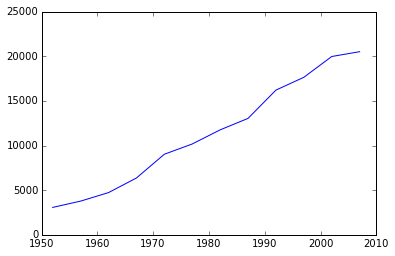

In [6]:
plt.plot(portugal.year, portugal.gdpPercap)

Per capita GDP has been increasing over time in Portugal. Cool!

(What you see above are `Matplotlib` defaults. For now, we'll continue with those as the first portion of this workshop is geared toward getting yourself familiar with the API&mdash;how to actually create the plots you're interested in. Then, we'll cover how to customize plot styles.)

Back to the plot. For data that has a time component, as the *yearly* GDP per capita does, a line is often an appropiate choice.

Next, it might be interesting to get a sense of how many countries per continent we have data for. Let's create a country `DataFrame` that includes unique combinations of country and continent.

In [7]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()

To get the counts, we can use the `.groupby()` method and create a `DataFrame` called "country_counts."

In [8]:
country_counts = pd.DataFrame({'n_countries' : countries.groupby('continent')['country'].count()}).reset_index()

In [9]:
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


For this data, because we're looking at distinct categories, let's create a bar plot.

By default, `Matplotlib` left-aligns bars. Let's fix that by using the `align` parameter. Let's also label the $x$-ticks so we know the continents the bars correspond to. While we're add it, we'll also add a title.

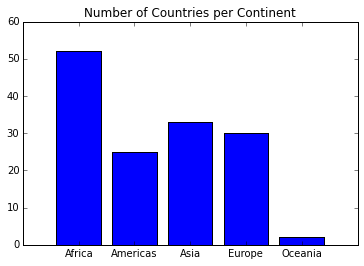

In [10]:
plt.bar(range(len(country_counts)), country_counts.n_countries, align='center')

plt.title('Number of Countries per Continent')
plt.xticks(country_counts['continent'].index, country_counts['continent']);

**Protip**: Use a semicolon (`;`) at the end of a line to suppress unwanted output.

Let's describe what's happening. For the title, simply add the text you'd like. The `.xticks()` method, for setting the $x$-axis tick labels, takes two arguments. The first is the *position* for the label and the second is the label itself. The arguments are container-like objects, such as `list`s or `NumPy` arrays. The lengths of the arguments *do not* have to be of the same length. However, this will cause certain labels you probably want or need to not be drawn onto the figure.

As you can see, we can call the `plt` multiple times and it will work on and modify the current figure. Most of the time, the order doesn't matter.

Next, let's start exploring the relationship between variables. An interesting one might be the relationship between per capita GDP and life expectancy. It's normally a good idea to transform GDP values. This is typically done by taking the log of the values.

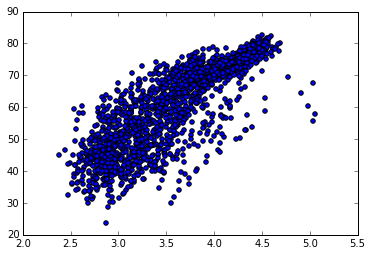

In [11]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'])

Like with `plot()`, the first argument in `scatter()` corresponds to the $x$-axis and the second to the $y$-axis.

This plot doesn't look _too_ great, though, especially since there are so many points and they overlap. We can do several things. Let's change the shape with the `marker` parameter, the fill color with the `facecolor` parameter, the opacity with the `alpha` parameter, and the border color of each marker with the `edgecolor` parameter.

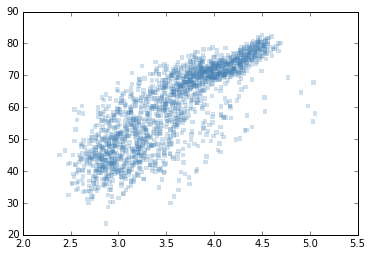

In [12]:
plt.scatter(np.log10(gm['gdpPercap']),
            gm['lifeExp'],
            marker='s',
            facecolor='SteelBlue',
            alpha=0.25,
            edgecolor='None')

There is a list of the possible values that `marker` can take. You can find more information on those [here](http://matplotlib.org/api/markers_api.html#markers). The `facecolor` parameter can take:

* single letters representing built-in colors (e.g., `b` for blue)
* html hex strings
* html color names
* RGB tuples (with each element between 0 and 1)
* string encoded floating point values between 0 and 1 (for gray shades)

This is the same for `edgecolor`. For *no* color, use `'None'`. For more information on colors in `Matplotlib` see [the documentation](http://matplotlib.org/api/colors_api.html#colors).

Finally, the `alpha` parameter specifies the opacity of *both* the marker face and edge colors. It can take values between 0 and 1, where a value of zero will make the color completely transparent and a value of one will make it solid.

Perhaps we like the the plot above, but are interested in average by continent and decade. For this, we'll first use `pandas`'s `.groupby()` method to create a new `DataFrame`. Then, we'll loop through each of the decades and plot the corresponding values. We also need to decide what colors to use for each decade. Before we do that, let's figure out how many decades we're dealing with.

In [13]:
gm.decade.unique()

array([1950, 1960, 1970, 1980, 1990, 2000])

Great! We have six decades worth of data, which means we'll need six colors. A great place to find information on color palettes is [ColorBrewer](http://colorbrewer2.org/). Matt Davis has created a great Python package called [Palettable](https://jiffyclub.github.io/palettable/) that gives you access to the ColorBrewer, Cubehelix, Tableau, and Wes Anderson palettes.

For our purposes, let's use a sequential palette from ColorBrewer. What makes this approach tedius, and the reason Palettable is recommended, is that you have to copy the hex codes one at a time.

In [14]:
hexsix = ['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837']

Next, we create the DataFrame.

In [15]:
gm_cd = gm.groupby(['continent', 'decade'], as_index=False)['gdpPercap', 'lifeExp'].mean()

Let's plot our values using a loop.

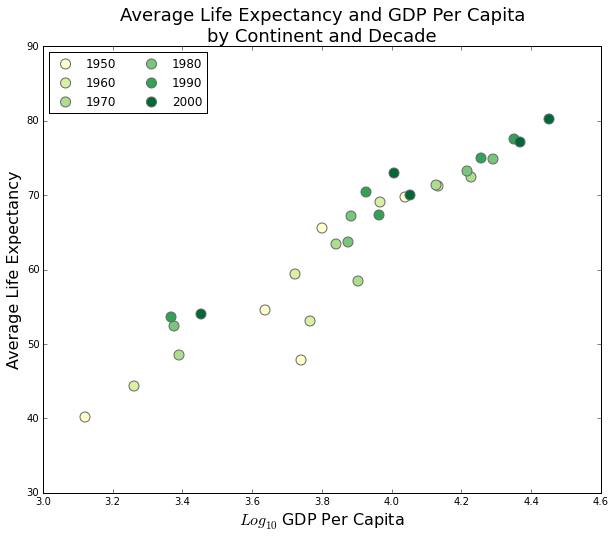

In [16]:
plt.figure(figsize=(10, 8))

for i, decade in enumerate(np.sort(gm_cd.decade.unique())):
    tdf = gm_cd[gm_cd['decade'] == decade]
    plt.scatter(np.log10(tdf['gdpPercap']),
                tdf['lifeExp'],
                s=100,
                facecolor=hexsix[i],
                alpha=1,
                edgecolor='DimGray',
                label=decade)

plt.title('Average Life Expectancy and GDP Per Capita\nby Continent and Decade', fontsize=18)
plt.ylabel('Average Life Expectancy', fontsize=16)
plt.xlabel('$Log_{10}$ GDP Per Capita', fontsize=16)
plt.legend(loc='upper left', ncol=2, scatterpoints=1)

We've introduced several new options with this plot.

First, we're able to control the figure size with `plt.figure(figsize=)`. `figsize` takes a tuple of width and height, in inches. (Note that figure sizes change with changes to DPI.)

For the plot itself, `s` specifies the marker size and `label` specifies the label we'll associate with that data for the legend.

We've seen the title before, but we're now specifying what the font size should be, in points. The `.ylabel()` and `.xlabel()` methods set the respective axis labels. You'll notice that they even accept LaTeX.

`plt.legend()` is also new. Here, we specify its positioning, layout, and number of markers (the default is three).

### Customization

The `Matplotlib` defaults aren't the best. (Changes are coming in [Matplotlib 2.0](http://matplotlib.org/style_changes.html), though!) We can, however, customize almost any property using the `matplotlibrc` configuration file. `Matplotlib` properties are called "rc settings" or "rc parameters."

This is typically found in the `.../site-packages/matplotlib/mpl-data` directory. Here is an example of a full path: `/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data`. This will depend on *where* your Python is installed.

Instead of modifying `matplotlibrc`, we'll change the default rc settings within Python. "The rc settings are stored in a dictionary-like variable called `matplotlib.rcParams`." Because we imported `Matplotlib` using `import matplotlib as mpl`, we'll use `mpl.rcParams`.

For more information on customizing `Matplotlib`, see the [documentation](http://matplotlib.org/users/customizing.html).

Below, you'll see a list of some rc parameters we're going to modify. This is good for the current session only. It *does not* modify your `matplotlibrc` file. To get a complete list of all the possible parameters, use `mpl.rcParams`. We are using Cameron Davidson-Pilon's [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/styles/matplotlibrc#L240) colors.

In [17]:
params = {'figure.facecolor' : 'white',
          'axes.facecolor' : 'white',
          
          'axes.titlesize' : 'x-large',
          'axes.axisbelow' : True,
          
          'axes.edgecolor' : 'DimGray',
          'axes.linewidth' : 0.5,
          
          'axes.labelsize' : 'large',
          'axes.labelcolor' : '#4A4A4A',
          
          'axes.grid' : True,
          'grid.linestyle' : ':',
          'grid.color' : 'DimGray',
          'grid.alpha' : 0.5,
          
          'axes.color_cycle' : ['#348ABD',
                                '#A60628',
                                '#7A68A6',
                                '#467821',
                                '#D55E00',
                                '#CC79A7',
                                '#56B4E9',
                                '#009E73',
                                '#F0E442',
                                '#0072B2'],
          
          'xtick.color' : '#4A4A4A',
          'xtick.major.size' : 0,
          'xtick.minor.size' : 0,
          'xtick.labelsize' : 'medium',
          
          'ytick.color' : '#4A4A4A',
          'ytick.major.size' : 0,
          'ytick.minor.size' : 0,
          'ytick.labelsize' : 'medium',
          
          'text.color' : '#4A4A4A',
          
          'legend.fancybox' : False,
          'legend.frameon' : False,
          'legend.fontsize' : 'large'}

for (k, v) in params.items(): # .iteritems() in Python 2.7
    plt.rcParams[k] = v

Let's see what changed! We'll plot the average yearly per capita GDP for each continent.

In [18]:
continent_gdp = gm.groupby(['continent', 'year'], as_index=False)['gdpPercap'].mean()
countries = np.sort(continent_gdp.continent.unique())

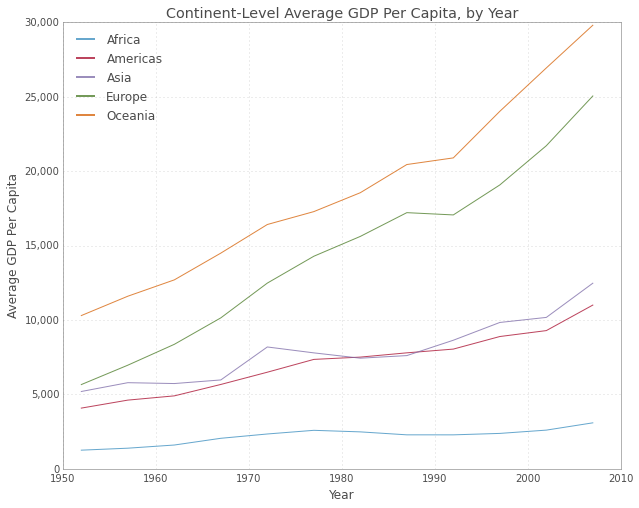

In [19]:
plt.figure(figsize=(10, 8))

for c in countries:
    tdf = continent_gdp[continent_gdp['continent'] == c]
    plt.plot(tdf['year'], tdf['gdpPercap'], alpha=0.75, label=c)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

plt.legend(loc='upper left')

lgnd = plt.gca().get_legend()
line_w = lgnd.get_lines()
plt.setp(line_w, linewidth=2);

Something new is the `.gca()` method. This gets the current axis. In this case, we're formatting the $y$-tick labels to include commas. The last code block above modifies the line width in the legend.

It might be interesting to look at the average per capita GDP for a given year. For Asia, 1972 has a potentially interesting increase.

In [20]:
gm1972 = gm[gm['year'] == 1972]

We'll want to look at continent-level data. For this, let's put the data into a list-like container.

In [21]:
continent_gdp_1972 = []

continents = np.sort(gm1972.continent.unique())
for c in continents:
    continent_gdp_1972.append(gm1972[gm1972['continent'] == c]['gdpPercap'].values)

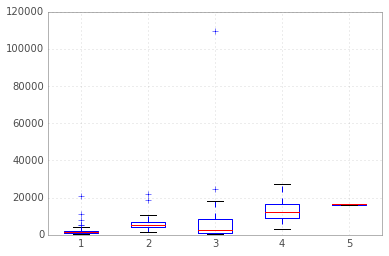

In [22]:
plt.boxplot(continent_gdp_1972);

Let's remove that outlier. We'll also update the plot styling.

In [23]:
continent_gdp_1972[2] = continent_gdp_1972[2][continent_gdp_1972[2] < 40000]

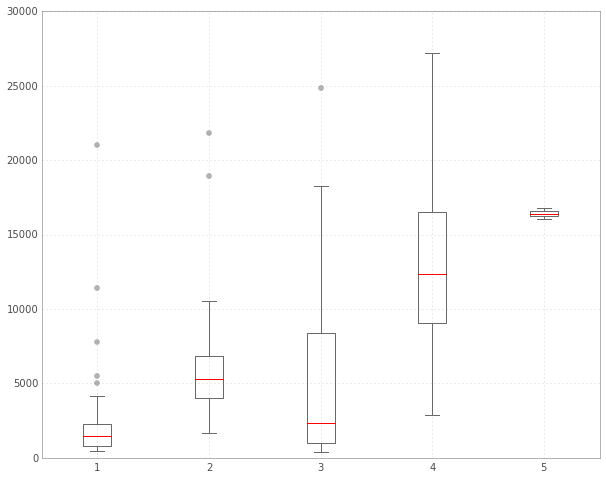

In [24]:
plt.figure(figsize=(10, 8))

color = 'DimGray'
flierprops = dict(marker='o', markersize=5, markerfacecolor=color,
                  markeredgecolor=color, alpha=0.50, linestyle='none')
capprops = dict(color=color)
whiskerprops = dict(color=color, linestyle='-')
boxprops = dict(color=color)

plt.boxplot(continent_gdp_1972, widths=0.25,
            flierprops=flierprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            boxprops=boxprops);

That's a lot of customization. For boxplots, there's an easier way&mdash;`Seaborn`.

Before we switch over to `Matplotlib`, it's important to note that it comes with several style sheets ([documentation](http://matplotlib.org/users/style_sheets.html)). We'll use the the Five Thirty Eight style.

In [25]:
plt.style.use('fivethirtyeight')

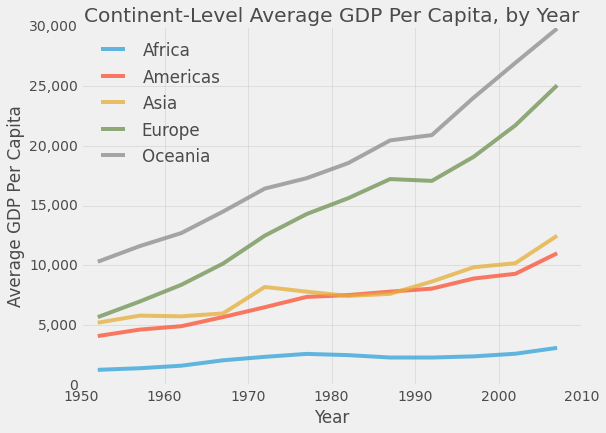

In [26]:
plt.figure(figsize=(8, 6))

for c in continents:
    tdf = continent_gdp[continent_gdp['continent'] == c]
    plt.plot(tdf['year'], tdf['gdpPercap'], alpha=0.75, label=c)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

plt.legend(loc='upper left')

To get a list of all available style sheets, use `plt.style.available`.

### Seaborn

"`Seaborn` is a Python visualization library based on `Matplotlib`. It provides a high-level interface for drawing attractive statistical graphics."

In [27]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

The `sns.set()` function allows us to change some of the `rcParams`. Here, we're changing the plot's face color.

We previously looked at boxplots in `Matplotlib`. Let's now look at the distribution of continent-level life expectancies. `Seaborn` includes support for `pandas` data structures. So, we can specify column names in `x` and `y` as well as, in this case, the `DataFrame` in `data`. In addition to the boxplot, we'll plot something called a stripplot, which shows the data values. In combination, they're quite useful for understanding distributions.

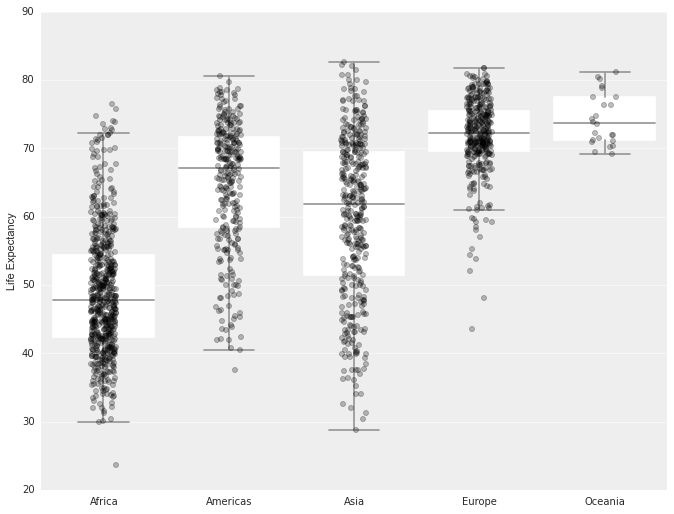

In [28]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='white', fliersize=0)
sns.stripplot(x="continent", y="lifeExp", data=gm,
              order=np.sort(gm.continent.unique()),
              alpha=0.25, size=5, jitter=True,
              color='Black', edgecolor='Black')

plt.xlabel('')
plt.ylabel('Life Expectancy')

It's possible to create a stripplot using `Matplotlib`, but it's not as easy as it is with `Seaborn`.

`Seaborn` is a package built for statistical data visualization. It includes many useful built-in plots, such as the following regression plot.

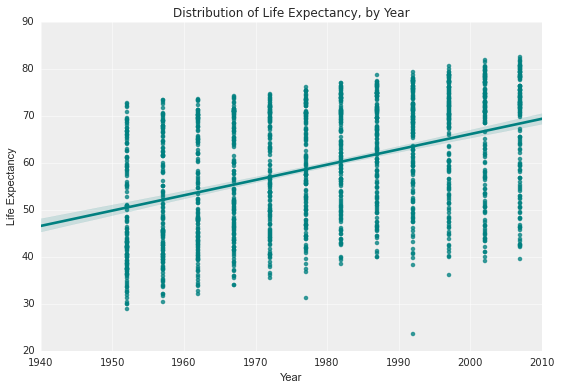

In [29]:
sns.regplot(x='year', y='lifeExp', data=gm, color='teal')

plt.title('Distribution of Life Expectancy, by Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

If we're interested in looking at the distribution of the life expectancy values in our data, we can use the kernel density plot.

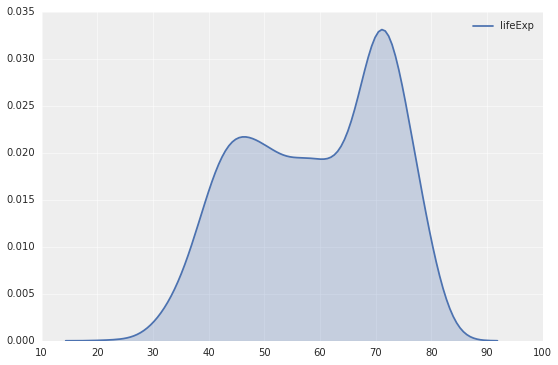

In [30]:
sns.kdeplot(gm.lifeExp, shade=True)

Another option is the `distplot()` function.

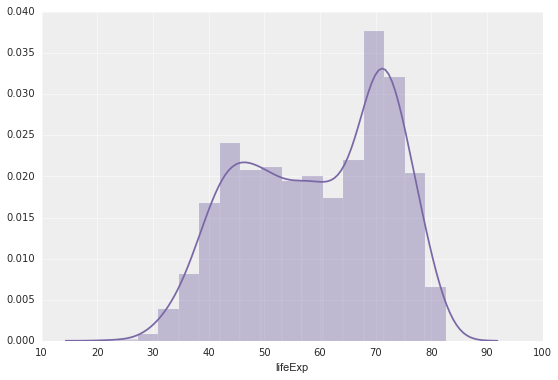

In [31]:
sns.distplot(gm.lifeExp, color='#7A68A6')

We can also compare the relationship between variables and visualize their respective distributions. Let's look at log of per capita GDP and life expectancy, as we've been doing.

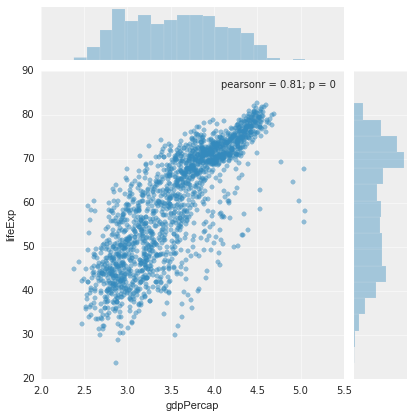

In [32]:
sns.jointplot(np.log10(gm.gdpPercap), gm.lifeExp, color="#348ABD", alpha=0.5)

It's important to note that a side effect of importing `Seaborn` is that it changes *all* plot styles. For example, if you wanted to create a line plot using `Matplotlib`, it would look like the following.

In [33]:
t = np.arange(0.0, 5.0, 0.1)
t1 = np.exp(-t) * np.cos(2*np.pi*t)

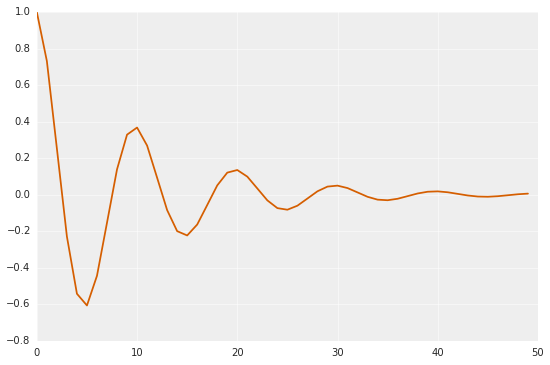

In [34]:
plt.plot(t1, color='#D55E00')

## Final Thoughts

Visualization is meant to convey information. There are many visualization libraries in Python and you now have experience in using two popular ones.

Options exist for creating *interactive* visualizations, too. For this, see [Plotly](https://plot.ly/python/), [Bokeh](http://bokeh.pydata.org/en/latest/), or [Toyplot](http://toyplot.readthedocs.org/en/stable/tutorial.html#getting-started).